<a href="https://colab.research.google.com/github/DataCrusade1999/Quantitative-Analytics/blob/master/Quantitative_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [ ]:
uploaded=files.upload()

Saving D__Important Stuff_Machine Learning Datasets_apl_ohlc.csv to D__Important Stuff_Machine Learning Datasets_apl_ohlc (1).csv


In [ ]:
aapl=pd.read_csv(io.BytesIO(uploaded['D__Important Stuff_Machine Learning Datasets_apl_ohlc.csv']))
#aapl['diff']=aapl.Open-aapl.Close

PERFORMING EDA ON DATA

In [ ]:
print(aapl.head(5))

         Date       High        Low       Open      Close     Volume  Adj Close
0  2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800   9.241351
1  2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200   9.145061
2  2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700   9.305547
3  2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800   9.237648
4  2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700   9.162347


In [ ]:
print(aapl.tail(5))

            Date       High        Low  ...      Close    Volume  Adj Close
1318  2011-12-23  57.655716  57.070000  ...  57.618572  67349800  49.790466
1319  2011-12-27  58.441429  57.574287  ...  58.075714  66269000  50.185513
1320  2011-12-28  58.321430  57.334286  ...  57.520000  57165500  49.705292
1321  2011-12-29  57.950001  57.215714  ...  57.874287  53994500  50.011452
1322  2011-12-30  58.040001  57.641430  ...  57.857143  44915500  49.996635

[5 rows x 7 columns]


In [ ]:
print(aapl.shape)

(1323, 7)


In [ ]:
print(aapl.columns)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [ ]:
print(aapl.describe())

              High          Low  ...        Volume    Adj Close
count  1323.000000  1323.000000  ...  1.323000e+03  1323.000000
mean     29.237566    28.507684  ...  1.882896e+08    24.964252
std      14.199012    14.029758  ...  1.027007e+08    12.201417
min      10.568571    10.371428  ...  3.937360e+07     9.040131
25%      17.752857    17.182143  ...  1.122037e+08    15.063183
50%      25.642857    24.725714  ...  1.629866e+08    21.707180
75%      39.132858    38.351429  ...  2.316230e+08    33.442190
max      60.957142    59.427143  ...  8.432424e+08    52.124886

[8 rows x 6 columns]


In [ ]:
print(aapl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1323 non-null   object 
 1   High       1323 non-null   float64
 2   Low        1323 non-null   float64
 3   Open       1323 non-null   float64
 4   Close      1323 non-null   float64
 5   Volume     1323 non-null   int64  
 6   Adj Close  1323 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.5+ KB
None


In [ ]:
print(aapl.isnull())

       Date   High    Low   Open  Close  Volume  Adj Close
0     False  False  False  False  False   False      False
1     False  False  False  False  False   False      False
2     False  False  False  False  False   False      False
3     False  False  False  False  False   False      False
4     False  False  False  False  False   False      False
...     ...    ...    ...    ...    ...     ...        ...
1318  False  False  False  False  False   False      False
1319  False  False  False  False  False   False      False
1320  False  False  False  False  False   False      False
1321  False  False  False  False  False   False      False
1322  False  False  False  False  False   False      False

[1323 rows x 7 columns]


In [ ]:
print(aapl.index)

RangeIndex(start=0, stop=1323, step=1)


In [ ]:
print(aapl.iloc[[1,2], [0,2,3,4]])

         Date        Low       Open      Close
1  2006-10-03  10.455714  10.635715  10.582857
2  2006-10-04  10.451428  10.585714  10.768572


In [ ]:
print(aapl.sample(20))

            Date       High        Low  ...      Close     Volume  Adj Close
1303  2011-12-02  56.232857  55.511429  ...  55.671429   94763900  48.107880
110   2007-03-13  12.942857  12.628572  ...  12.628572  216972700  10.912846
8     2006-10-12  10.770000  10.514286  ...  10.751429  148213800   9.290734
758   2009-10-06  27.144285  26.757143  ...  27.144285  151271400  23.456444
859   2010-03-03  29.981428  29.705715  ...  29.904285   93013200  25.841471
73    2007-01-18  13.158571  12.721429  ...  12.724286  591151400  10.995556
488   2008-09-10  22.141428  21.257143  ...  21.658571  243285700  18.716030
481   2008-08-29  24.785715  24.148571  ...  24.218571  149822400  20.928223
340   2008-02-08  17.957144  17.371429  ...  17.925714  338993200  15.490315
768   2009-10-20  28.821428  28.264286  ...  28.394285  285259800  24.536613
48    2006-12-08  12.770000  12.428572  ...  12.608571  196069300  10.895564
1174  2011-06-01  50.304287  49.235714  ...  49.358570  138670700  42.652683

ANALYSING RETURNS

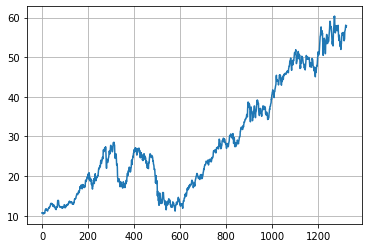

In [ ]:
aapl['Close'].plot(grid=True)
plt.show()

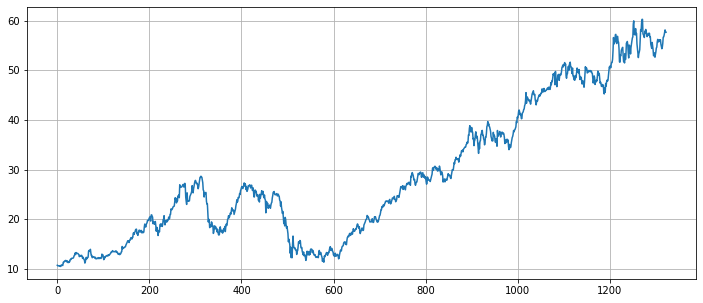

In [ ]:
aapl['Open'].plot(grid=True,figsize=(12,5))
plt.show()

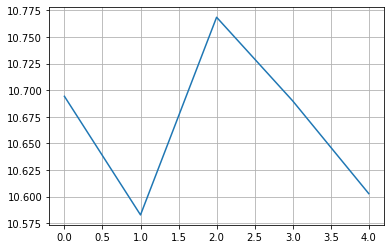

In [ ]:
aapl['Close'].head(5).plot(grid=True)
plt.show()

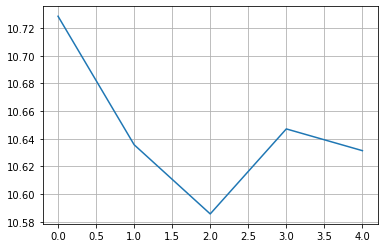

In [ ]:
aapl['Open'].head(5).plot(grid=True)
plt.show()

In [ ]:
daily_close=aapl[['Adj Close']]
daily_pct_change=daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change.head(10))

   Adj Close
0   0.000000
1  -0.010419
2   0.017549
3  -0.007297
4  -0.008152
5   0.005524
6  -0.010988
7  -0.007858
8   0.027721
9  -0.003189


In [ ]:
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns.head(10))

   Adj Close
0        NaN
1  -0.010474
2   0.017397
3  -0.007323
4  -0.008185
5   0.005509
6  -0.011048
7  -0.007889
8   0.027344
9  -0.003194


In [ ]:
#prefer this method while calculating daily percent change
daily_pct_change = daily_close / daily_close.shift(1) - 1
print(daily_pct_change.head(10))

   Adj Close
0        NaN
1  -0.010419
2   0.017549
3  -0.007297
4  -0.008152
5   0.005524
6  -0.010988
7  -0.007858
8   0.027721
9  -0.003189


In [ ]:
daily_log_returns_shift=np.log(daily_close / daily_close.shift(1))
print(daily_log_returns_shift.head(10))

   Adj Close
0        NaN
1  -0.010474
2   0.017397
3  -0.007323
4  -0.008185
5   0.005509
6  -0.011048
7  -0.007889
8   0.027344
9  -0.003194


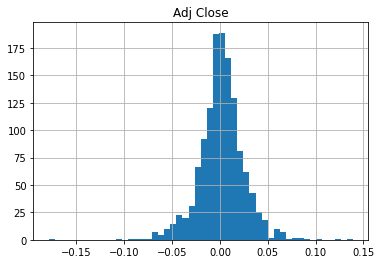

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [ ]:
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())

In [ ]:
cum_daily_return=(1+daily_pct_change).cumprod()
print(cum_daily_return.head(10))

   Adj Close
0        NaN
1   0.989581
2   1.006947
3   0.999599
4   0.991451
5   0.996928
6   0.985974
7   0.978226
8   1.005344
9   1.002137


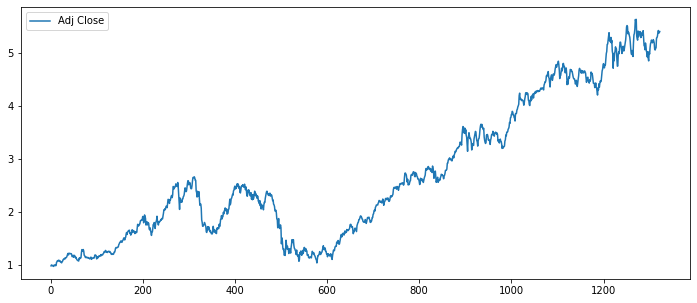

In [ ]:
cum_daily_return.plot(figsize=(12,5))
plt.show()

In [ ]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['GS', 'ORCL', 'BB','AAPL','BLK']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
print(all_data)

                         High         Low  ...     Volume   Adj Close
Ticker Date                                ...                       
GS     2006-10-02  171.449997  168.509995  ...  4143700.0  142.503113
       2006-10-03  174.399994  170.100006  ...  5823500.0  145.433533
       2006-10-04  176.660004  173.309998  ...  8069400.0  147.403778
       2006-10-05  176.520004  174.690002  ...  5749400.0  146.518845
       2006-10-06  176.000000  173.800003  ...  4898200.0  146.644073
...                       ...         ...  ...        ...         ...
BLK    2011-12-23  178.729996  175.000000  ...   313100.0  141.655060
       2011-12-27  179.770004  177.020004  ...   310700.0  141.202438
       2011-12-28  177.880005  175.899994  ...   301000.0  140.090897
       2011-12-29  179.500000  176.550003  ...   342200.0  142.441101
       2011-12-30  179.429993  177.869995  ...   252200.0  141.520050

[6615 rows x 6 columns]


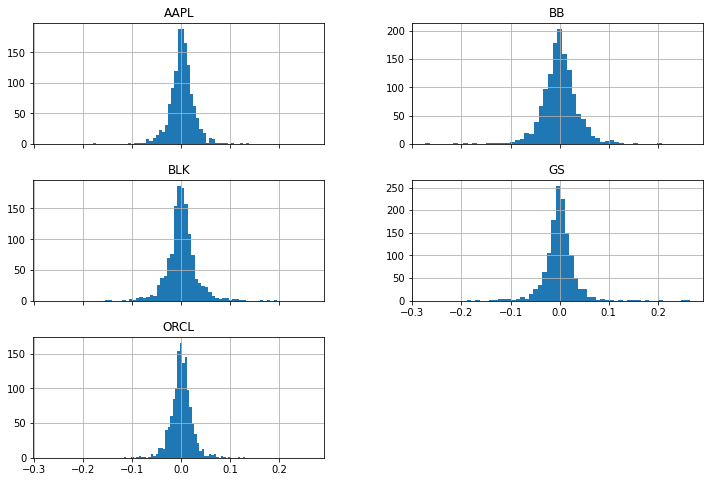

In [ ]:
daily_close_nStocks=all_data[['Adj Close']].reset_index().pivot('Date','Ticker','Adj Close')
daily_pct_change=daily_close_nStocks.pct_change()
daily_pct_change.hist(bins=50,sharex=True,figsize=(12,8))
plt.show()

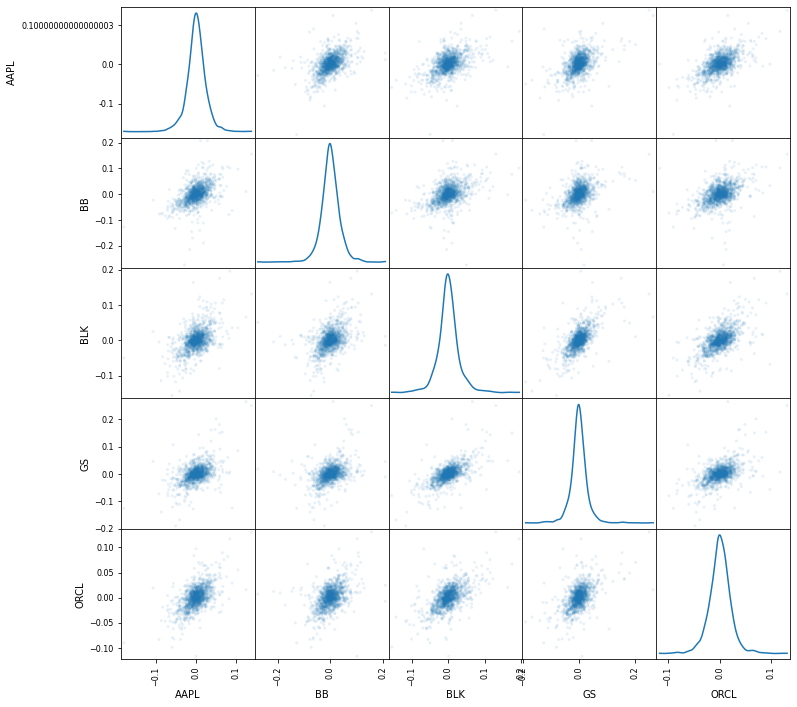

In [ ]:
pd.plotting.scatter_matrix(daily_pct_change,diagonal='kde',figsize=(12,12),alpha=0.1)
plt.show()

In [ ]:
daily_log_returns=np.log(daily_close_nStocks/daily_close_nStocks.shift(1))
print(daily_log_returns.head(10))

Ticker          AAPL        BB       BLK        GS      ORCL
Date                                                        
2006-10-02       NaN       NaN       NaN       NaN       NaN
2006-10-03 -0.010474  0.020389  0.000829  0.020355  0.013498
2006-10-04  0.017397  0.063852  0.017998  0.013456  0.014972
2006-10-05 -0.007323  0.011151  0.011128 -0.006022  0.004940
2006-10-06 -0.008185 -0.011243 -0.000537  0.000854 -0.003841
2006-10-09  0.005509  0.043264  0.006688  0.010195  0.019598
2006-10-10 -0.011048 -0.007511  0.024234  0.007915  0.010190
2006-10-11 -0.007889 -0.009804 -0.007773  0.000615 -0.008574
2006-10-12  0.027344 -0.005569 -0.004139  0.014093  0.021826
2006-10-13 -0.003194  0.024994 -0.015795  0.012809  0.004204


MOVING WINDOWS

In [ ]:
print(all_data[['Adj Close']].rolling(40).var())

                   Adj Close
Ticker Date                 
GS     2006-10-02        NaN
       2006-10-03        NaN
       2006-10-04        NaN
       2006-10-05        NaN
       2006-10-06        NaN
...                      ...
BLK    2011-12-23  40.720930
       2011-12-27  43.559189
       2011-12-28  45.045671
       2011-12-29  44.347283
       2011-12-30  44.943747

[6615 rows x 1 columns]


In [ ]:
print(all_data[['Adj Close']].rolling(40).std())

                   Adj Close
Ticker Date                 
GS     2006-10-02        NaN
       2006-10-03        NaN
       2006-10-04        NaN
       2006-10-05        NaN
       2006-10-06        NaN
...                      ...
BLK    2011-12-23   6.381295
       2011-12-27   6.599939
       2011-12-28   6.711607
       2011-12-29   6.659376
       2011-12-30   6.704010

[6615 rows x 1 columns]


In [ ]:
print(all_data[['Adj Close']].rolling(40).mean())

                    Adj Close
Ticker Date                  
GS     2006-10-02         NaN
       2006-10-03         NaN
       2006-10-04         NaN
       2006-10-05         NaN
       2006-10-06         NaN
...                       ...
BLK    2011-12-23  129.968247
       2011-12-27  130.155169
       2011-12-28  130.550399
       2011-12-29  131.157777
       2011-12-30  131.633433

[6615 rows x 1 columns]


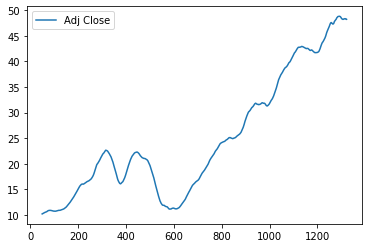

In [ ]:
moving_average=aapl[['Adj Close']].rolling(50).mean()
moving_average.plot()
plt.show()

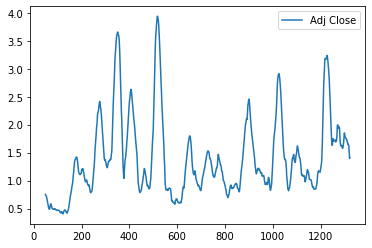

In [ ]:
moving_std=aapl[['Adj Close']].rolling(50).std()
moving_std.plot()
plt.show()

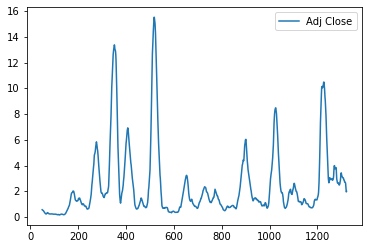

In [ ]:
moving_var=aapl[['Adj Close']].rolling(50).var()
moving_var.plot()
plt.show()

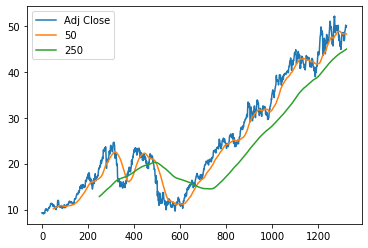

In [ ]:
adj_close=aapl[['Adj Close']]
aapl['50']=adj_close.rolling(50).mean()
aapl['250']=adj_close.rolling(250).mean()
aapl[['Adj Close','50','250']].plot()
plt.show()

VOLATILITY CALCULATIONS

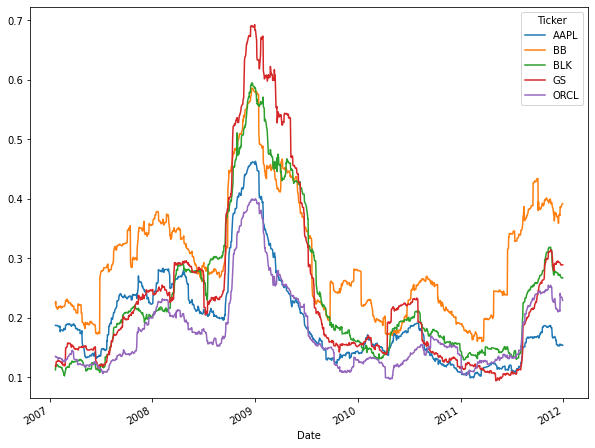

In [ ]:
volatility=daily_pct_change.rolling(75).std()*np.sqrt(75)
volatility.plot(figsize=(10,8))
plt.show()

**Ordinary Least-Squares Regression (OLS)**



In [ ]:
AAPL_returns=daily_log_returns.iloc[:,0]
GS_returns=daily_log_returns.iloc[:,3]
return_data=pd.concat([AAPL_returns,GS_returns],axis=1)[1:]
X = sm.add_constant(return_data['AAPL'])
model = sm.OLS(return_data['GS'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     GS   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     400.3
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           5.49e-78
Time:                        14:01:20   Log-Likelihood:                 2852.3
No. Observations:                1322   AIC:                            -5701.
Df Residuals:                    1320   BIC:                            -5690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.635      0.1

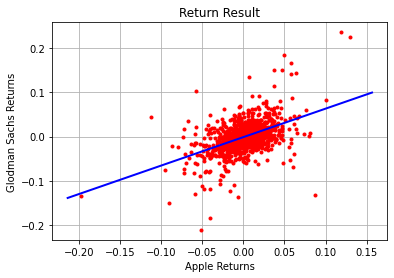

In [ ]:
plt.plot(return_data['AAPL'],return_data['GS'],'r.')
ax = plt.axis()
x = np.linspace(ax[0] , ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', linewidth=2)
plt.grid(True)
plt.xlabel('Apple Returns')
plt.ylabel('Glodman Sachs Returns')
plt.title('Return Result')
plt.show()

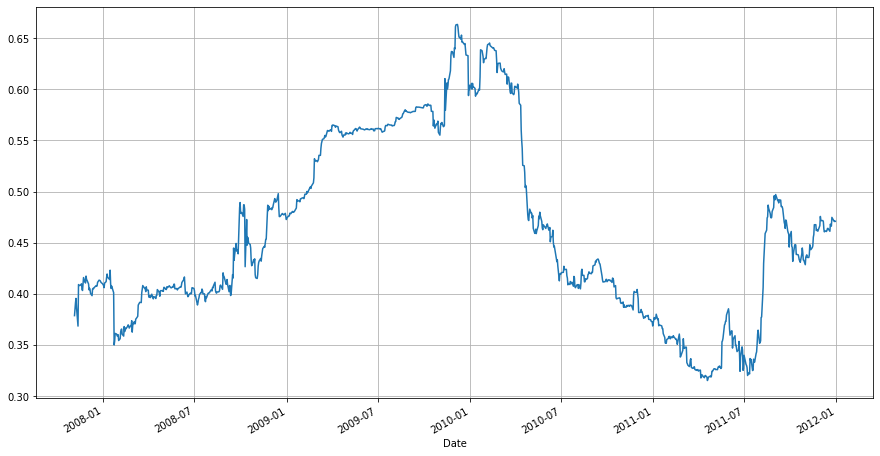

In [ ]:
return_data['GS'].rolling(275).corr(return_data['AAPL']).plot(grid=True,figsize=(15,8))
plt.show()